In [1]:
from langchain.schema.output_parser import StrOutputParser
from langchain_core.messages import SystemMessage,HumanMessage,AIMessage,ToolMessage,AIMessageChunk
from langchain_core.prompts import PromptTemplate,ChatPromptTemplate,SystemMessagePromptTemplate,HumanMessagePromptTemplate
from langchain_openai.chat_models import ChatOpenAI
import os
from dotenv import load_dotenv
from langchain.schema.runnable import Runnable,RunnableLambda,RunnableSequence,RunnablePassthrough,RunnableParallel
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_ollama import OllamaEmbeddings



In [2]:
import faiss
from langchain_community.vectorstores import FAISS 
from langchain_community.docstore.in_memory import InMemoryDocstore

In [3]:
embeddings = OllamaEmbeddings(model='nomic-embed-text', base_url='http://localhost:11434')

db_name = r"D:\LANG_CHAIN\hugging_face\health_supplements"
vector_store = FAISS.load_local(db_name, embeddings, allow_dangerous_deserialization=True)

In [4]:
### Retreival
question = "how to gain muscle mass?"
docs = vector_store.search(query=question, k=5, search_type="similarity")

In [5]:
docs

[Document(id='e1d686da-eb0f-46f8-95ae-b4510e67403a', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\gym supplements\\2. High Prevalence of Supplement Intake.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\gym supplements\\2. High Prevalence of Supplement Intake.pdf', 'total_pages': 11, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:39:04+00:00', 'trapped': '', 'modDate': 'D:20241021113904Z', 'creationDate': '', 'page': 8}, page_content='and strength gain among men. We detected more prevalent protein and creatine supplementation\namong younger compared to older ﬁtness center users, whereas the opposite was found for vitamin\nsupplementation. Other authors made similar observations [23] and it might reﬂect the diﬀerent\ntraining goals among age groups, i.e., more focus on strength and muscles among the younger and\nmore focus on health among the older age groups.\nCo

In [6]:
retriever = vector_store.as_retriever(search_type = 'similarity', 
                                      search_kwargs = {'k': 3})

retriever.invoke(question)

[Document(id='e1d686da-eb0f-46f8-95ae-b4510e67403a', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\gym supplements\\2. High Prevalence of Supplement Intake.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\gym supplements\\2. High Prevalence of Supplement Intake.pdf', 'total_pages': 11, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:39:04+00:00', 'trapped': '', 'modDate': 'D:20241021113904Z', 'creationDate': '', 'page': 8}, page_content='and strength gain among men. We detected more prevalent protein and creatine supplementation\namong younger compared to older ﬁtness center users, whereas the opposite was found for vitamin\nsupplementation. Other authors made similar observations [23] and it might reﬂect the diﬀerent\ntraining goals among age groups, i.e., more focus on strength and muscles among the younger and\nmore focus on health among the older age groups.\nCo

In [7]:
question = "how to lose weight?"
retriever.invoke(question)

[Document(id='3bc381bf-0351-4519-b70f-4dce452091ad', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'total_pages': 17, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:37:54+00:00', 'trapped': '', 'modDate': 'D:20241021113754Z', 'creationDate': '', 'page': 12}, page_content='Int. J. Environ. Res. Public Health 2021, 18, 8897\n13 of 24\n3.3. Dietary Supplements and Weight Loss\nThe number of people with excessive weight continues to rise, and ﬁghting obesity\nhas become one of the greatest challenges of contemporary medicine. A person wishing to\nlose weight needs to undertake several difﬁcult life-changes and practice them consistently\n(diet, physical activity, addiction-free). Meanwhile dietary supplements are presented as\na com

In [8]:
retriever = vector_store.as_retriever(search_type = 'similarity_score_threshold', 
                                      search_kwargs = {'k': 3, 'score_threshold': 0.1})

retriever.invoke(question)

[Document(id='3bc381bf-0351-4519-b70f-4dce452091ad', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'total_pages': 17, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:37:54+00:00', 'trapped': '', 'modDate': 'D:20241021113754Z', 'creationDate': '', 'page': 12}, page_content='Int. J. Environ. Res. Public Health 2021, 18, 8897\n13 of 24\n3.3. Dietary Supplements and Weight Loss\nThe number of people with excessive weight continues to rise, and ﬁghting obesity\nhas become one of the greatest challenges of contemporary medicine. A person wishing to\nlose weight needs to undertake several difﬁcult life-changes and practice them consistently\n(diet, physical activity, addiction-free). Meanwhile dietary supplements are presented as\na com

In [9]:
retriever = vector_store.as_retriever(search_type = 'mmr', 
                                      search_kwargs = {'k': 3, 'fetch_k': 20, 'lambda_mult': 1})

docs = retriever.invoke(question)
docs

[Document(id='3bc381bf-0351-4519-b70f-4dce452091ad', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'total_pages': 17, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:37:54+00:00', 'trapped': '', 'modDate': 'D:20241021113754Z', 'creationDate': '', 'page': 12}, page_content='Int. J. Environ. Res. Public Health 2021, 18, 8897\n13 of 24\n3.3. Dietary Supplements and Weight Loss\nThe number of people with excessive weight continues to rise, and ﬁghting obesity\nhas become one of the greatest challenges of contemporary medicine. A person wishing to\nlose weight needs to undertake several difﬁcult life-changes and practice them consistently\n(diet, physical activity, addiction-free). Meanwhile dietary supplements are presented as\na com

In [10]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"distance_metric": "euclidean", "k": 5})
docs = retriever.invoke(question)
docs

[Document(id='3bc381bf-0351-4519-b70f-4dce452091ad', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'total_pages': 17, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:37:54+00:00', 'trapped': '', 'modDate': 'D:20241021113754Z', 'creationDate': '', 'page': 12}, page_content='Int. J. Environ. Res. Public Health 2021, 18, 8897\n13 of 24\n3.3. Dietary Supplements and Weight Loss\nThe number of people with excessive weight continues to rise, and ﬁghting obesity\nhas become one of the greatest challenges of contemporary medicine. A person wishing to\nlose weight needs to undertake several difﬁcult life-changes and practice them consistently\n(diet, physical activity, addiction-free). Meanwhile dietary supplements are presented as\na com

In [11]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"distance_metric": "manhattan", "k": 5})
docs = retriever.invoke(question)
docs

[Document(id='3bc381bf-0351-4519-b70f-4dce452091ad', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'total_pages': 17, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:37:54+00:00', 'trapped': '', 'modDate': 'D:20241021113754Z', 'creationDate': '', 'page': 12}, page_content='Int. J. Environ. Res. Public Health 2021, 18, 8897\n13 of 24\n3.3. Dietary Supplements and Weight Loss\nThe number of people with excessive weight continues to rise, and ﬁghting obesity\nhas become one of the greatest challenges of contemporary medicine. A person wishing to\nlose weight needs to undertake several difﬁcult life-changes and practice them consistently\n(diet, physical activity, addiction-free). Meanwhile dietary supplements are presented as\na com

In [12]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"distance_metric": "dot", "k": 5})
docs = retriever.invoke(question)
docs

[Document(id='3bc381bf-0351-4519-b70f-4dce452091ad', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'total_pages': 17, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:37:54+00:00', 'trapped': '', 'modDate': 'D:20241021113754Z', 'creationDate': '', 'page': 12}, page_content='Int. J. Environ. Res. Public Health 2021, 18, 8897\n13 of 24\n3.3. Dietary Supplements and Weight Loss\nThe number of people with excessive weight continues to rise, and ﬁghting obesity\nhas become one of the greatest challenges of contemporary medicine. A person wishing to\nlose weight needs to undertake several difﬁcult life-changes and practice them consistently\n(diet, physical activity, addiction-free). Meanwhile dietary supplements are presented as\na com

In [13]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"distance_metric": "mips", "k": 5})
docs = retriever.invoke(question)
docs

[Document(id='3bc381bf-0351-4519-b70f-4dce452091ad', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'total_pages': 17, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:37:54+00:00', 'trapped': '', 'modDate': 'D:20241021113754Z', 'creationDate': '', 'page': 12}, page_content='Int. J. Environ. Res. Public Health 2021, 18, 8897\n13 of 24\n3.3. Dietary Supplements and Weight Loss\nThe number of people with excessive weight continues to rise, and ﬁghting obesity\nhas become one of the greatest challenges of contemporary medicine. A person wishing to\nlose weight needs to undertake several difﬁcult life-changes and practice them consistently\n(diet, physical activity, addiction-free). Meanwhile dietary supplements are presented as\na com

In [16]:
bm25_retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 5})
vector_retriever = vector_store.as_retriever(search_type="mmr", search_kwargs={"k": 5, "lambda_mult": 0.5})

bm25_docs = bm25_retriever.invoke(question)
vector_docs = vector_retriever.invoke(question)

# Merge results based on alpha (simple interpolation)
alpha = 0.5
merged_docs = bm25_docs[:int(alpha * len(bm25_docs))] + vector_docs[:int((1 - alpha) * len(vector_docs))]

merged_docs


[Document(id='3bc381bf-0351-4519-b70f-4dce452091ad', metadata={'producer': 'iLovePDF', 'creator': '', 'creationdate': '', 'source': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'file_path': 'D:\\LANG_CHAIN\\hugging_face\\health supplements\\1.dietary supplements.pdf', 'total_pages': 17, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-10-21T11:37:54+00:00', 'trapped': '', 'modDate': 'D:20241021113754Z', 'creationDate': '', 'page': 12}, page_content='Int. J. Environ. Res. Public Health 2021, 18, 8897\n13 of 24\n3.3. Dietary Supplements and Weight Loss\nThe number of people with excessive weight continues to rise, and ﬁghting obesity\nhas become one of the greatest challenges of contemporary medicine. A person wishing to\nlose weight needs to undertake several difﬁcult life-changes and practice them consistently\n(diet, physical activity, addiction-free). Meanwhile dietary supplements are presented as\na com

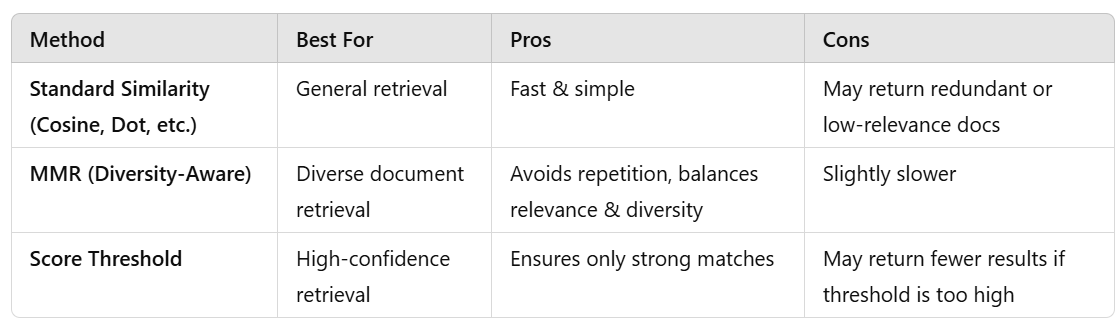